In [ ]:
# importing the requried packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing Dataset
data=pd.read_csv('zomato.csv')

In [ ]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


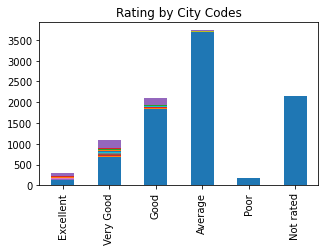

In [ ]:
#Displaying the ratings of restaurants by country code
excellent_rating = data[data['Rating text']=='Excellent']['Country Code'].value_counts()
very_good_rating = data[data['Rating text']=='Very Good']['Country Code'].value_counts()
good_rating = data[data['Rating text']=='Good']['Country Code'].value_counts()
average_rating = data[data['Rating text']=='Average']['Country Code'].value_counts()
poor_rating = data[data['Rating text']=='Poor']['Country Code'].value_counts()
not_rated_rating = data[data['Rating text']=='Not rated']['Country Code'].value_counts()

df_rating = pd.DataFrame([excellent_rating,very_good_rating,good_rating,average_rating, poor_rating,not_rated_rating])
df_rating.index = ['Excellent','Very Good','Good','Average','Poor','Not rated']
df_rating.plot(kind='bar',stacked=True, figsize=(5,3), title="Rating by City Codes",legend=False)

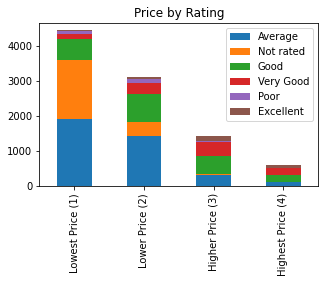

In [ ]:
#Displaying the ratings of the restaurants by price range (4 is high; 1 is low)
lowest_price = data[data['Price range']== 1]['Rating text'].value_counts()
lower_price = data[data['Price range']== 2]['Rating text'].value_counts()
higher_price = data[data['Price range']== 3]['Rating text'].value_counts()
highest_price = data[data['Price range']== 4]['Rating text'].value_counts()

df_price_by_rating = pd.DataFrame([lowest_price,lower_price,higher_price,highest_price])
df_price_by_rating.index = ['Lowest Price (1)','Lower Price (2)','Higher Price (3)','Highest Price (4)']
df_price_by_rating.plot(kind='bar',stacked=True, figsize=(5,3), title="Price by Rating")
#From this chart we can see that lower priced food is often not rated.
#Therefore, by similar case imputation, I can replace the 'not rated'
#with the average rating of lower priced food.
#It is also interesting to note that lower priced food is considered average for the most part,
#while more expensive food is rated more highly
#Expensive food seems rarer than low cost food.

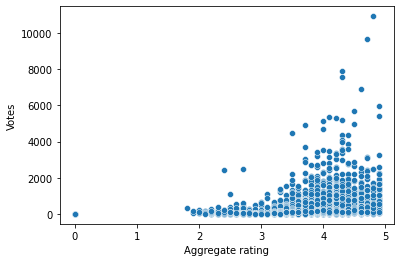

In [ ]:
#Displaying the ratings of the restaurants by popularity (number of votes)

sns.scatterplot(x='Aggregate rating',y='Votes',data=data)

#As expected, the top-rated restaurants also have the most votes.
#So popularity is correlated with a high rating.

In [ ]:
#PART TWO: DATA CLEANING, FEATURE SELECTION (AND FEATURE ENGINEERING?)
#The dataset is already pretty clean in terms of the features I am focusing on.
#However, there are many unneeded features that I will drop.
X = data.drop(['Restaurant ID','Restaurant Name','Country Code', 'Address', 'Locality', 'Locality Verbose','Longitude','Latitude','Cuisines','Currency','Is delivering now','Switch to order menu','Rating color'], axis=1)
y = data['Rating text']
X=X.drop(['Rating text'], axis=1)       #remove the dependent variable (Rating text) from the dataframe X
print(X.head)
print(y)


<bound method NDFrame.head of                   City  Average Cost for two  ... Aggregate rating Votes
0          Makati City                  1100  ...              4.8   314
1          Makati City                  1200  ...              4.5   591
2     Mandaluyong City                  4000  ...              4.4   270
3     Mandaluyong City                  1500  ...              4.9   365
4     Mandaluyong City                  1500  ...              4.8   229
...                ...                   ...  ...              ...   ...
9546         ЫБstanbul                    80  ...              4.1   788
9547         ЫБstanbul                   105  ...              4.2  1034
9548         ЫБstanbul                   170  ...              3.7   661
9549         ЫБstanbul                   120  ...              4.0   901
9550         ЫБstanbul                    55  ...              4.0   591

[9551 rows x 7 columns]>
0       Excellent
1       Excellent
2       Very Good
3       Excell

In [ ]:
data['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
X.isna().sum()

City                    0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

In [ ]:
#converting catagoriacl data into numerical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
y=labelEncoder_X.fit_transform(y)
#Double-checking
print(y[0:20])
print(data['Rating text'][0:20])
#Shows that excellent = 1, very good = 5, good = 2, average = 0, and assuming poor = 3.

[1 1 5 1 1 5 5 5 1 1 1 5 1 5 5 2 5 1 1 5]
0     Excellent
1     Excellent
2     Very Good
3     Excellent
4     Excellent
5     Very Good
6     Very Good
7     Very Good
8     Excellent
9     Excellent
10    Excellent
11    Very Good
12    Excellent
13    Very Good
14    Very Good
15         Good
16    Very Good
17    Excellent
18    Excellent
19    Very Good
Name: Rating text, dtype: object


In [ ]:
#converting catagoriacl data into numerical data
X['City']=labelEncoder_X.fit_transform(X['City'])
X['City']

0        73
1        73
2        75
3        75
4        75
       ... 
9546    140
9547    140
9548    140
9549    140
9550    140
Name: City, Length: 9551, dtype: int64

In [ ]:
#converting Yes And No to 1 and 0
X['Has Table booking'] = X['Has Table booking'].replace(['Yes', 'No'], [1, 0])

In [ ]:
X['Has Online delivery'] = X['Has Online delivery'].replace(['Yes', 'No'], [1, 0])

In [ ]:
X.head()

,City,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
0,73,1100,1,0,3,4.8,314
1,73,1200,1,0,3,4.5,591
2,75,4000,1,0,4,4.4,270
3,75,1500,0,0,4,4.9,365
4,75,1500,1,0,4,4.8,229


In [ ]:
# spliting the data to test data and train data to train and test the model
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
# printing the shape of the test data and train data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6685, 7)
(2866, 7)
(6685,)
(2866,)


In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
mymodel = KNeighborsClassifier(n_neighbors=11)

In [ ]:
mymodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
output=mymodel.predict(X_test)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,output))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1134
           1       0.42      0.15      0.22        92
           2       0.50      0.51      0.50       634
           3       0.97      0.97      0.97       634
           4       0.00      0.00      0.00        51
           5       0.48      0.33      0.39       321

    accuracy                           0.71      2866
   macro avg       0.52      0.47      0.48      2866
weighted avg       0.68      0.71      0.69      2866



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier=RandomForestClassifier(n_estimators=10)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#predecting for train data
train_output=classifier.predict(X_train)

In [ ]:
# Confusion matrix for training data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train,train_output)
conf

array([[2603,    0,    0,    0,    0,    0],
       [   0,  209,    0,    0,    0,    0],
       [   0,    0, 1466,    0,    0,    0],
       [   0,    0,    0, 1514,    0,    0],
       [   0,    0,    0,    0,  135,    0],
       [   0,    0,    0,    0,    0,  758]])

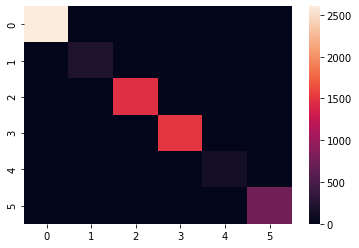

In [ ]:
sns.heatmap(conf)

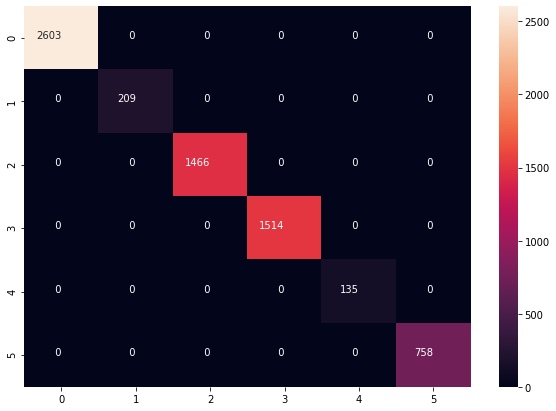

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_train,train_output), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [ ]:
#Testing the Model With Test Data
test_output=classifier.predict(X_test)

In [ ]:
conf2 = confusion_matrix(y_test,test_output)
conf2

array([[1134,    0,    0,    0,    0,    0],
       [   0,   90,    0,    0,    0,    2],
       [   0,    0,  634,    0,    0,    0],
       [   0,    0,    0,  634,    0,    0],
       [   0,    0,    0,    0,   51,    0],
       [   0,    0,    0,    0,    0,  321]])

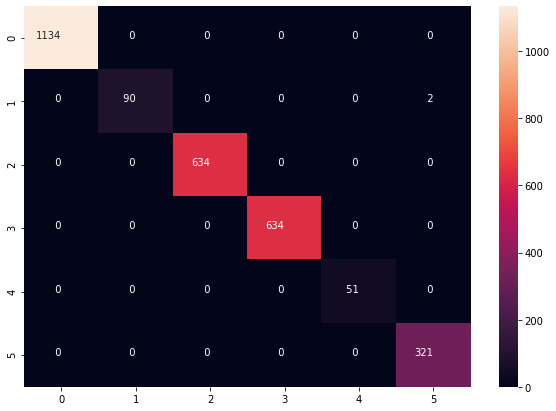

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test,test_output), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_output))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1134
           1       1.00      0.98      0.99        92
           2       1.00      1.00      1.00       634
           3       1.00      1.00      1.00       634
           4       1.00      1.00      1.00        51
           5       0.99      1.00      1.00       321

    accuracy                           1.00      2866
   macro avg       1.00      1.00      1.00      2866
weighted avg       1.00      1.00      1.00      2866



In [ ]:
#accuracy using train dataset
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train , y=y_train , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean())

Random Forest:
 Accuracy: 0.9967090482711706


In [ ]:
#accuracy using test dataset
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_test , y=y_test , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean())


Random Forest:
 Accuracy: 0.9898747593869546


In [ ]:
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(X_train,y_train)
y_predict=ETree.predict(X_test)

accuracies = cross_val_score(estimator = ETree, X=X_train , y=y_train , cv = 10)
print("Extra Tree:\n Accuracy:", accuracies.mean())
from sklearn.metrics import r2_score

print(r2_score(y_test,y_predict))

Extra Tree:
 Accuracy: 0.9997147430593849
0.9997820677780969


In [ ]:
from sklearn import preprocessing
X_train=preprocessing.scale(X_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras

In [ ]:
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(25, activation='relu', input_shape=(n_cols,)))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(15,activation='softplus'))
model.add(Dense(10,activation='softmax'))a
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, shuffle=False,epochs=50 )

Epoch 1/50
209/209 [==============================] - 0s 2ms/step - loss: 2.1422e-07 - accuracy: 0.3894
Epoch 2/50
209/209 [==============================] - 0s 2ms/step - loss: 2.1422e-07 - accuracy: 0.3894
Epoch 3/50
209/209 [==============================] - 0s 2ms/step - loss: 2.1422e-07 - accuracy: 0.3894
Epoch 4/50
209/209 [==============================] - 0s 2ms/step - loss: 2.1422e-07 - accuracy: 0.3894
Epoch 5/50
209/209 [==============================] - 0s 2ms/step - loss: 2.1422e-07 - accuracy: 0.3894
Epoch 6/50
209/209 [==============================] - 0s 2ms/step - loss: 2.1422e-07 - accuracy: 0.3894
Epoch 7/50
209/209 [==============================] - 0s 2ms/step - loss: 2.1422e-07 - accuracy: 0.3894
Epoch 8/50
209/209 [==============================] - 0s 2ms/step - loss: 2.1422e-07 - accuracy: 0.3894
Epoch 9/50
209/209 [==============================] - 0s 2ms/step - loss: 2.1422e-07 - accuracy: 0.3894
Epoch 10/50
209/209 [==============================] - 0s 2ms/st

In [ ]:
model.evaluate(X_test,y_test,verbose=0)

[2.1092473900807818e-07, 0.3956734240055084]

In [ ]:
y_rf=classifier.predict(X_test)
print(y_rf)

[0 1 2 ... 2 0 0]


In [ ]:
y_et=ETree.predict(X_test)
print(y_et)

[0. 1. 2. ... 2. 0. 0.]


In [ ]:
len(y_et)

2866

In [ ]:
for i in range(0,2866):
  y_et[i]=int(round(y_et[i]))
print(y_et)
print(set(y_et))

[0. 1. 2. ... 2. 0. 0.]
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}


In [ ]:
l=[]
for i in range(0,2866):
  l.append(i)
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

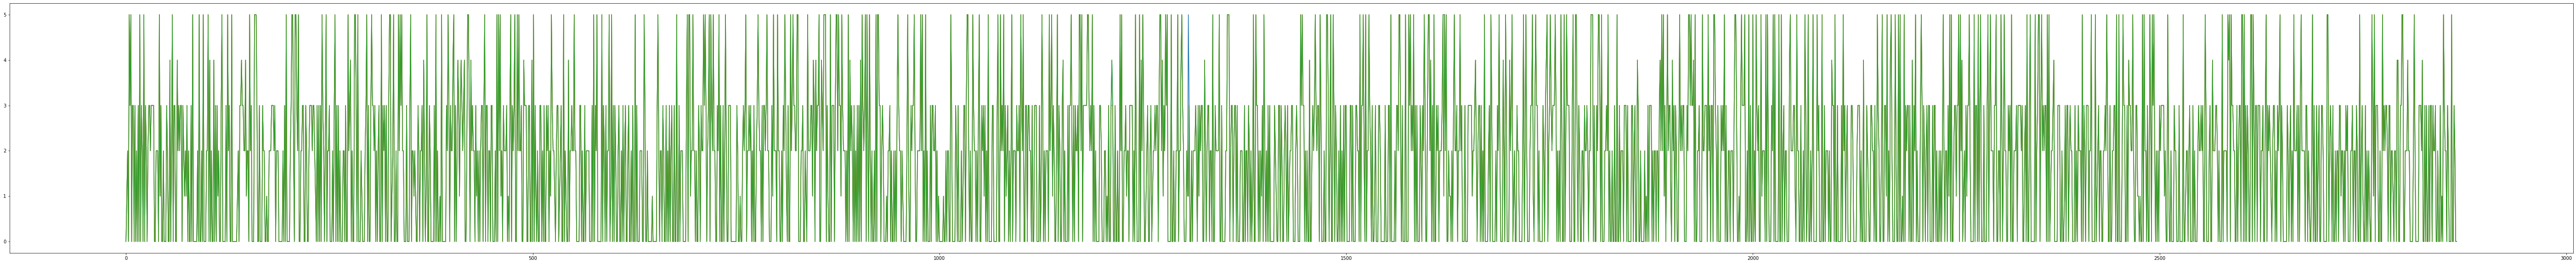

In [ ]:
plt.figure(figsize=(100,10))
plt.plot(l, y_rf,l, y_et,l,y_test)

In [ ]:
x=[]
y=[]
z=[]
p=[]
for i in range(0,100):
  x.append(i)
  y.append(y_rf[i])
  z.append(y_et[i])
  p.append(y_test[i])

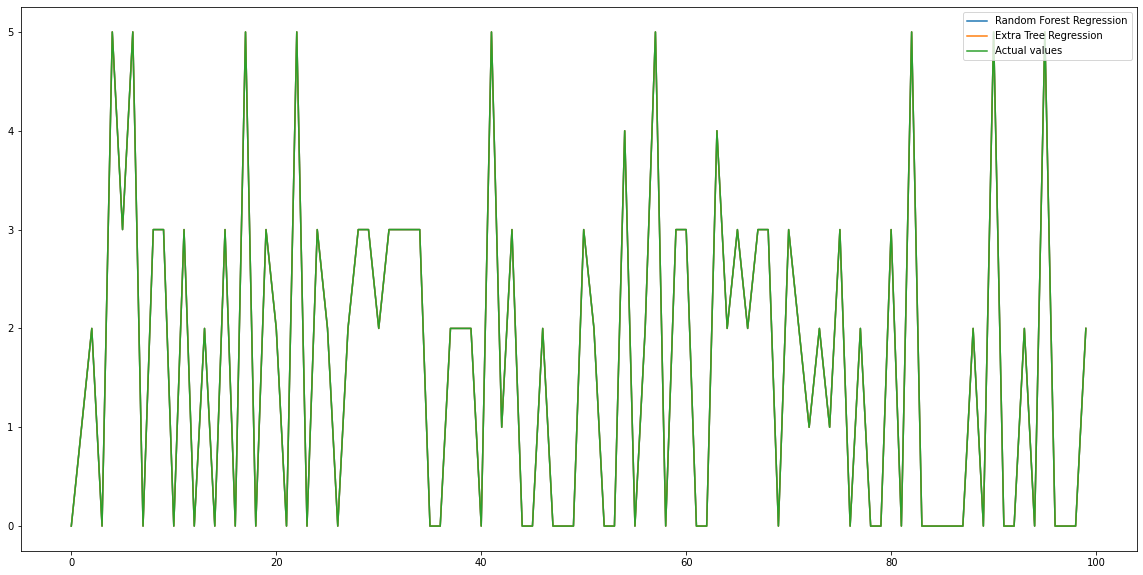

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(x, y,x, z,x,p)
plt.legend(('Random Forest Regression', 'Extra Tree Regression', 'Actual values'),loc='upper right')

In [ ]:
conf = confusion_matrix(y_test,y_et)
conf

array([[1134,    0,    0,    0,    0,    0],
       [   0,   92,    0,    0,    0,    0],
       [   0,    0,  634,    0,    0,    0],
       [   0,    0,    0,  634,    0,    0],
       [   0,    0,    0,    1,   50,    0],
       [   0,    0,    0,    0,    0,  321]])

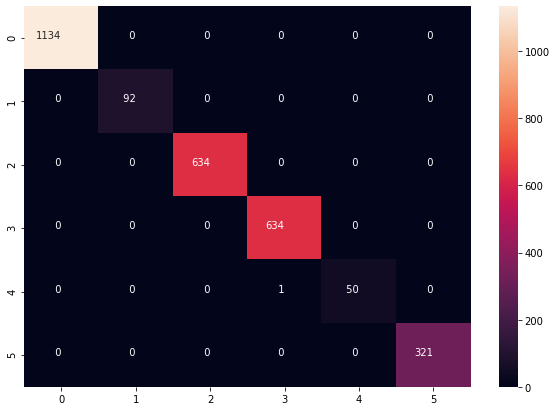

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test,y_et), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})